In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x = df[["Annual Income (k$)","Spending Score (1-100)"]]

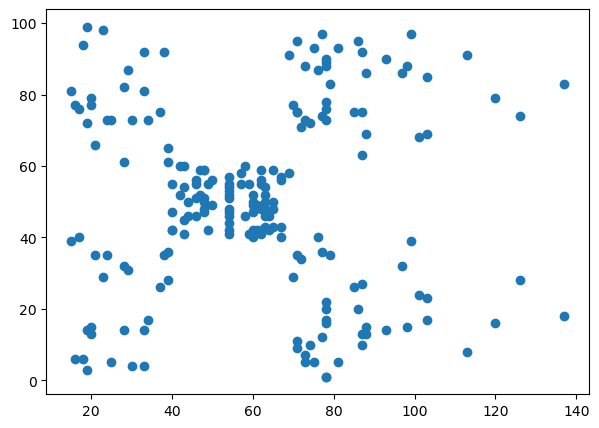

In [8]:
plt.figure(figsize=(7,5))
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"])


In [11]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_scaled = s.fit_transform(x)

In [12]:
dbscan = DBSCAN(eps=0.3,min_samples=5)
clusters=dbscan.fit_predict(x_scaled)


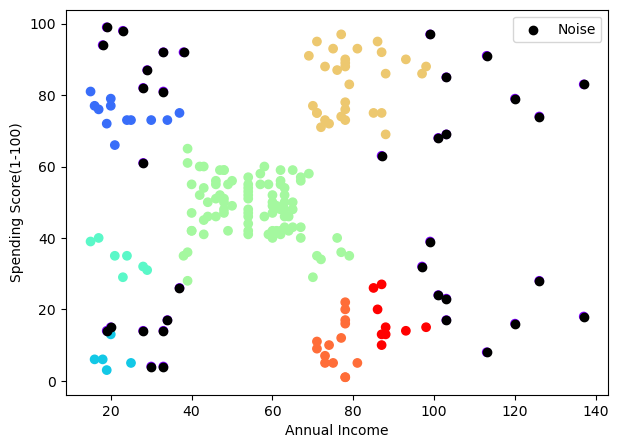

In [18]:
plt.figure(figsize=(7,5))
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],c=clusters,cmap="rainbow")
plt.scatter(df.iloc[clusters == -1]["Annual Income (k$)"],df.iloc[clusters == -1]["Spending Score (1-100)"],color="black",label="Noise")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score(1-100)")
plt.legend()

In [21]:
from sklearn.metrics import silhouette_score
eps_values = [0.2,0.3,0.5]
for eps in eps_values:
  print(f"\n Evaluting DBSCAN using eps={eps}")
  dbscan = DBSCAN(eps=eps, min_samples=5)
  labels = dbscan.fit_predict(x_scaled)
  unique_labels = set(labels)
  n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
  n_noise = list(labels).count(-1)
  noise_ratio = n_noise / len(labels)
  print(f"Number of clusters: {n_clusters}")
  print(f"Number of Noise points : ", round(noise_ratio,2))
  if n_clusters > 1:
    x_non_noise = x[labels != -1]
    labels_non_noise = labels[labels != -1]
    sc = StandardScaler()
    x_scaled_non_noise = sc.fit_transform(x_non_noise)


 Evaluting DBSCAN using eps=0.2
Number of clusters: 7
Number of Noise points :  0.39

 Evaluting DBSCAN using eps=0.3
Number of clusters: 7
Number of Noise points :  0.17

 Evaluting DBSCAN using eps=0.5
Number of clusters: 2
Number of Noise points :  0.04
